In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import tables

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [162]:
from keras.models import Sequential
from keras.utils import np_utils 

from keras.layers import Conv2D, MaxPooling2D

from keras.layers import Activation, Flatten, Dropout, Dense


from keras.utils import to_categorical

In [163]:
emotion=pd.read_csv("/Users/ajay/Documents/IPyNote/Emotion/train.csv")

In [164]:
emotion.head(3)

,Emotion,Pixels
0,3,221 240 251 254 255 255 255 255 255 255 255 25...
1,6,100 107 108 104 103 113 117 115 120 130 138 14...
2,4,35 50 56 57 63 76 74 79 85 86 105 133 145 152 ...


In [165]:
emotion.shape

(4178, 2)

In [166]:
#emotion['Pixels'].str.split(' ',1,expand=True)
splitted = emotion['Pixels'].apply(lambda x: pd.Series(str(x).split(' ')))

In [167]:
emotion=pd.concat([emotion,splitted],axis=1)

In [168]:
emotion.drop('Pixels',axis=1,inplace=True)

In [169]:
emotion.head(2)

,Emotion,0,1,2,3,4,5,6,7,8,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,3,221,240,251,254,255,255,255,255,255,...,105,107,124,41,16,20,38,43,19,16
1,6,100,107,108,104,103,113,117,115,120,...,136,137,133,123,112,109,108,114,109,101


In [170]:
Y=emotion['Emotion']
X=emotion.iloc[:,1:]

In [171]:
X.shape

(4178, 2304)

In [172]:
Y.shape

(4178,)

In [173]:
Y=to_categorical(Y)
X=X.iloc[:,:].astype('float32')

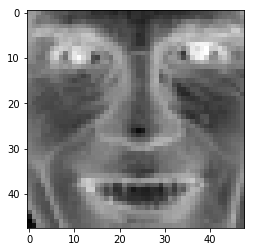

In [189]:
plt.imshow(X.iloc[8,:].values.reshape(48,48),cmap='binary')

In [195]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,random_state=34,test_size=0.25)
X_train=X_train.values.reshape(X_train.shape[0],48,48,1)
X_test=X_test.values.reshape(X_test.shape[0],48,48,1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


In [199]:
input_shape=(48,48,1)
n_classes=Y_train.shape[1]
batch_size=128
epochs=30
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='same',activation='relu',input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2,2)))#,strides=(1,1)))

model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(1000,activation='relu'))
model.add(Dense(n_classes,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(lr=0.05),metrics=["accuracy"])
model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))

model.evaluate(X_test,Y_test,verbose=0)

Train on 3133 samples, validate on 1045 samples
Epoch 1/30
3133/3133 [==============================] - 34s 11ms/step - loss: 1.8477 - acc: 0.2962 - val_loss: 1.9049 - val_acc: 0.3378
Epoch 2/30
3133/3133 [==============================] - 37s 12ms/step - loss: 1.8016 - acc: 0.3093 - val_loss: 1.7384 - val_acc: 0.3847
Epoch 3/30
3133/3133 [==============================] - 39s 13ms/step - loss: 1.7486 - acc: 0.3511 - val_loss: 1.8127 - val_acc: 0.2124
Epoch 4/30
3133/3133 [==============================] - 36s 11ms/step - loss: 1.6143 - acc: 0.4105 - val_loss: 1.5219 - val_acc: 0.4469
Epoch 5/30
3133/3133 [==============================] - 32s 10ms/step - loss: 1.4514 - acc: 0.4839 - val_loss: 1.5076 - val_acc: 0.4947
Epoch 6/30
3133/3133 [==============================] - 32s 10ms/step - loss: 1.3027 - acc: 0.5337 - val_loss: 1.1675 - val_acc: 0.6010
Epoch 7/30
3133/3133 [==============================] - 33s 10ms/step - loss: 1.2237 - acc: 0.5774 - val_loss: 1.2311 - val_acc: 0.6010


[0.7837480186845698, 0.7645933018346722]

In [200]:
model.save('mymodel.h5')

In [201]:
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

In [202]:
X=X.values.reshape(X.shape[0],48,48,1)
X = X.astype('float32')
X = X.astype('float32')

X /= 255


model.fit(X,Y,batch_size=batch_size,epochs=25,verbose=1)


test=pd.read_csv("/Users/ajay/Documents/IPyNote/Emotion/test.csv")
test.head(3)


Epoch 1/25
4178/4178 [==============================] - 40s 10ms/step - loss: 0.4168 - acc: 0.8550
Epoch 2/25
4178/4178 [==============================] - 39s 9ms/step - loss: 0.4266 - acc: 0.8619
Epoch 3/25
2560/4178 [=================>............] - ETA: 14s - loss: 0.3410 - acc: 0.8859

KeyboardInterrupt: 

In [ ]:
split_test = test['Pixels'].apply(lambda x: pd.Series(str(x).split(' ')))

test=pd.concat([test,split_test],axis=1)

test.drop('Pixels',axis=1,inplace=True)





test=test.iloc[:,:].astype('float32')

plt.imshow(test.iloc[8,:].values.reshape(48,48),cmap='binary')

X=test.values.reshape(test.shape[0],48,48,1)


test = test.astype('float32')
test /= 255
Y_pred=model.predict(X)

In [ ]:
print("type(Y_pred) ",type(Y_pred))
Y_pred.shape

Y_pred=np.argmax(Y_pred, axis=1)
np.set_printoptions(threshold=np.nan)

In [ ]:
model.save('mymodel.h5')